In [1]:
import numpy as np
import pandas as pd
import nltk
import matplotlib.pyplot as plt
import seaborn as sns
import re
import pickle
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [2]:
df = pd.read_csv("training_set.tsv", sep='\t', encoding="ISO-8859-1")
df.head()

,essay_id,essay_set,essay,rater1_domain1,rater2_domain1,rater3_domain1,domain1_score,rater1_domain2,rater2_domain2,domain2_score,...,rater2_trait3,rater2_trait4,rater2_trait5,rater2_trait6,rater3_trait1,rater3_trait2,rater3_trait3,rater3_trait4,rater3_trait5,rater3_trait6
0,1,7,Patience is when your waiting .I was patience ...,8,7,NaN,15,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,7,"I am not a patience person, like I canât sit...",6,7,NaN,13,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,7,One day I was at basketball practice and I was...,7,8,NaN,15,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,7,I going to write about a time when I went to t...,8,9,NaN,17,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,7,It can be very hard for somebody to be patient...,7,6,NaN,13,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
df.describe()

,essay_id,essay_set,rater1_domain1,rater2_domain1,rater3_domain1,domain1_score,rater1_domain2,rater2_domain2,domain2_score,rater1_trait1,...,rater2_trait3,rater2_trait4,rater2_trait5,rater2_trait6,rater3_trait1,rater3_trait2,rater3_trait3,rater3_trait4,rater3_trait5,rater3_trait6
count,1569.000000,1569.0,1569.000000,1569.000000,0.0,1569.00000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
mean,785.000000,7.0,8.023582,8.038878,NaN,16.06246,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,453.075601,0.0,2.424120,2.517367,NaN,4.58535,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,1.000000,7.0,0.000000,0.000000,NaN,2.00000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,393.000000,7.0,6.000000,6.000000,NaN,13.00000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,785.000000,7.0,8.000000,8.000000,NaN,16.00000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,1177.000000,7.0,10.000000,10.000000,NaN,19.00000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,1569.000000,7.0,12.000000,12.000000,NaN,24.00000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1569 entries, 0 to 1568
Data columns (total 28 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   essay_id        1569 non-null   int64  
 1   essay_set       1569 non-null   int64  
 2   essay           1569 non-null   object 
 3   rater1_domain1  1569 non-null   int64  
 4   rater2_domain1  1569 non-null   int64  
 5   rater3_domain1  0 non-null      float64
 6   domain1_score   1569 non-null   int64  
 7   rater1_domain2  0 non-null      float64
 8   rater2_domain2  0 non-null      float64
 9   domain2_score   0 non-null      float64
 10  rater1_trait1   0 non-null      float64
 11  rater1_trait2   0 non-null      float64
 12  rater1_trait3   0 non-null      float64
 13  rater1_trait4   0 non-null      float64
 14  rater1_trait5   0 non-null      float64
 15  rater1_trait6   0 non-null      float64
 16  rater2_trait1   0 non-null      float64
 17  rater2_trait2   0 non-null      f

In [5]:
df.shape

(1569, 28)

In [6]:
df.isnull().sum()

essay_id             0
essay_set            0
essay                0
rater1_domain1       0
rater2_domain1       0
rater3_domain1    1569
domain1_score        0
rater1_domain2    1569
rater2_domain2    1569
domain2_score     1569
rater1_trait1     1569
rater1_trait2     1569
rater1_trait3     1569
rater1_trait4     1569
rater1_trait5     1569
rater1_trait6     1569
rater2_trait1     1569
rater2_trait2     1569
rater2_trait3     1569
rater2_trait4     1569
rater2_trait5     1569
rater2_trait6     1569
rater3_trait1     1569
rater3_trait2     1569
rater3_trait3     1569
rater3_trait4     1569
rater3_trait5     1569
rater3_trait6     1569
dtype: int64

In [7]:
df.dropna(axis=1, inplace=True)

In [8]:
df.shape

(1569, 6)

In [9]:
df.head()

,essay_id,essay_set,essay,rater1_domain1,rater2_domain1,domain1_score
0,1,7,Patience is when your waiting .I was patience ...,8,7,15
1,2,7,"I am not a patience person, like I canât sit...",6,7,13
2,3,7,One day I was at basketball practice and I was...,7,8,15
3,4,7,I going to write about a time when I went to t...,8,9,17
4,5,7,It can be very hard for somebody to be patient...,7,6,13


In [10]:
df['essay_set'].value_counts()

7    1569
Name: essay_set, dtype: int64

In [11]:
df.drop(columns=['rater1_domain1', 'rater2_domain1'], inplace=True, axis=1)

In [12]:
df.shape

(1569, 4)

In [13]:
df.head()

,essay_id,essay_set,essay,domain1_score
0,1,7,Patience is when your waiting .I was patience ...,15
1,2,7,"I am not a patience person, like I canât sit...",13
2,3,7,One day I was at basketball practice and I was...,15
3,4,7,I going to write about a time when I went to t...,17
4,5,7,It can be very hard for somebody to be patient...,13


In [14]:
min(df['domain1_score'])

2

In [15]:
max(df['domain1_score'])

24

In [16]:
df.skew()

essay_id         0.000000
essay_set        0.000000
domain1_score   -0.229558
dtype: float64

In [17]:
df.kurtosis()

essay_id        -1.200000
essay_set        0.000000
domain1_score   -0.490134
dtype: float64

/var/folders/kn/gnm3d9hn21d8t3q08syhwsdw0000gp/T/ipykernel_6931/1034205877.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['domain1_score'])


<Axes: xlabel='domain1_score', ylabel='Density'>

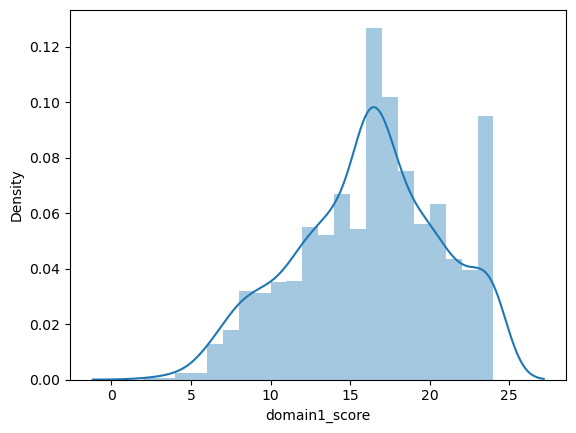

In [18]:
sns.distplot(df['domain1_score'])

In [19]:
df[df['essay_set']==7]['domain1_score']

0       15
1       13
2       15
3       17
4       13
        ..
1564    12
1565    16
1566    19
1567    22
1568    15
Name: domain1_score, Length: 1569, dtype: int64

In [20]:
min_range = [2,1,0,0,0,0,0,0]
max_range = [12,6,3,3,4,4,30,60]

def normalize(x,mi,ma):
    x = (x-mi)/(ma-mi)
    return round(x*10)

df['final_score']=df.apply(lambda x: normalize(x['domain1_score'], min_range[x['essay_set']-1], max_range[x['essay_set']-1]), axis=1)

In [21]:
df['final_score']

0       5
1       4
2       5
3       6
4       4
       ..
1564    4
1565    5
1566    6
1567    7
1568    5
Name: final_score, Length: 1569, dtype: int64

/var/folders/kn/gnm3d9hn21d8t3q08syhwsdw0000gp/T/ipykernel_6931/3249593394.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['final_score'])


<Axes: xlabel='final_score', ylabel='Density'>

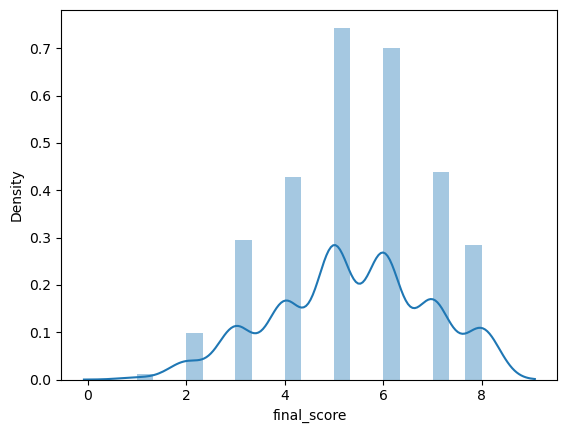

In [22]:
sns.distplot(df['final_score'])

In [23]:
df.skew()

essay_id         0.000000
essay_set        0.000000
domain1_score   -0.229558
final_score     -0.198435
dtype: float64

In [24]:
df.head()

,essay_id,essay_set,essay,domain1_score,final_score
0,1,7,Patience is when your waiting .I was patience ...,15,5
1,2,7,"I am not a patience person, like I canât sit...",13,4
2,3,7,One day I was at basketball practice and I was...,15,5
3,4,7,I going to write about a time when I went to t...,17,6
4,5,7,It can be very hard for somebody to be patient...,13,4


In [25]:
df.describe()

,essay_id,essay_set,domain1_score,final_score
count,1569.000000,1569.0,1569.00000,1569.000000
mean,785.000000,7.0,16.06246,5.356278
std,453.075601,0.0,4.58535,1.562442
min,1.000000,7.0,2.00000,1.000000
25%,393.000000,7.0,13.00000,4.000000
50%,785.000000,7.0,16.00000,5.000000
75%,1177.000000,7.0,19.00000,6.000000
max,1569.000000,7.0,24.00000,8.000000


In [26]:
df.drop('domain1_score', axis=1, inplace=True)

In [27]:
df.head()

,essay_id,essay_set,essay,final_score
0,1,7,Patience is when your waiting .I was patience ...,5
1,2,7,"I am not a patience person, like I canât sit...",4
2,3,7,One day I was at basketball practice and I was...,5
3,4,7,I going to write about a time when I went to t...,6
4,5,7,It can be very hard for somebody to be patient...,4


**Pre-Processing**

In [28]:
def clean_essay(essay):
    x = []
    for i in essay.split():
        if i.startswith("@"):
            continue
        else:
            x.append(i)
    return ' '.join(x)

df['essay'] = df['essay'].apply(lambda x: clean_essay(x))

In [29]:
stop_words = set(stopwords.words('english'))
def remove_stop_words(essay):
    word_tokens = word_tokenize(essay)
    filtered_sentence = []
    for w in word_tokens:
        if w not in stop_words:
            filtered_sentence.append(w)
    return ' '.join(filtered_sentence)

df['clean_essay'] = df['essay'].apply(lambda x: remove_stop_words(x))

In [30]:
def remove_puncs(essay):
    essay = re.sub("[^A-Za-z ]", "", essay)
    return essay

df['clean_essay'] = df['clean_essay'].apply(lambda x: remove_puncs(x))

In [31]:
df.head()

,essay_id,essay_set,essay,final_score,clean_essay
0,1,7,Patience is when your waiting .I was patience ...,5,Patience waiting I patience line waiting lunch...
1,2,7,"I am not a patience person, like I canât sit...",4,I patience person like I cant sit sit five mi...
2,3,7,One day I was at basketball practice and I was...,5,One day I basketball practice I running team I...
3,4,7,I going to write about a time when I went to t...,6,I going write time I went fair fun saw ride ...
4,5,7,It can be very hard for somebody to be patient...,4,It hard somebody patient If patient understa...


In [32]:
def sent2word(x):
    x = re.sub("[^A-Za-z0-9]", " ", x)
    words = nltk.word_tokenize(x)
    return words

def essay2word(essay):
    essay = essay.strip()
    tokenizer = nltk.data.load('tokenizers/punkt/english.pickle')
    raw = tokenizer.tokenize(essay)
    final_words = []
    for i in raw:
        if len(i) > 0:
            final_words.append(sent2word(i))
    return final_words

def noOfWords(essay):
    count = 0
    for i in essay2word(essay):
        count = count + len(i)
    return count

def noOfChar(essay):
    count = 0
    for i in essay2word(essay):
        for j in i:
            count = count + len(j)
    return count

def avg_word_len(essay):
    return noOfChar(essay) / noOfWords(essay)

def noOfSent(essay):
    return len(essay2word(essay))

def count_pos(essay):
    sentences = essay2word(essay)
    noun_count = 0
    adj_count = 0
    verb_count = 0
    adverb_count = 0
    for i in sentences:
        pos_sentence = nltk.pos_tag(i)
        for j in pos_sentence:
            pos_tag = j[1]
            if pos_tag[0] == 'N':
                noun_count += 1
            elif pos_tag[0] == 'V':
                verb_count += 1
            elif pos_tag[0] == 'J':
                adj_count += 1
            elif pos_tag[0] == 'R':
                adverb_count += 1
    return noun_count, verb_count, adj_count, adverb_count

data = open('big.txt').read()
words = re.findall('[a-z]+', data.lower())

def check_spell_error(essay):
    essay = essay.lower()
    new_essay = re.sub("[^A-Za-z0-9]", " ", essay)
    new_essay = re.sub("[0-9]", "", new_essay)
    count = 0
    all_words = new_essay.split()
    for i in all_words:
        if i not in words:
            count += 1
    return count

In [33]:
df.head()

,essay_id,essay_set,essay,final_score,clean_essay
0,1,7,Patience is when your waiting .I was patience ...,5,Patience waiting I patience line waiting lunch...
1,2,7,"I am not a patience person, like I canât sit...",4,I patience person like I cant sit sit five mi...
2,3,7,One day I was at basketball practice and I was...,5,One day I basketball practice I running team I...
3,4,7,I going to write about a time when I went to t...,6,I going write time I went fair fun saw ride ...
4,5,7,It can be very hard for somebody to be patient...,4,It hard somebody patient If patient understa...


**Prep for ML**

In [34]:
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/ibsrinivas/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [35]:
pro_data = df.copy()
pro_data['char_count'] = pro_data['essay'].apply(noOfChar)
pro_data['word_count'] = pro_data['essay'].apply(noOfWords)
pro_data['sent_count'] = pro_data['essay'].apply(noOfSent)
pro_data['avg_word_len'] = pro_data['essay'].apply(avg_word_len)
pro_data['spell_err_count'] = pro_data['essay'].apply(check_spell_error)
pro_data['noun_count'], pro_data['adj_count'], pro_data['verb_count'], pro_data['adv_count'] = zip(*pro_data['essay'].map(count_pos))
pro_data.to_csv("Processed_data.csv")

In [36]:
prep_df = pd.read_csv("Processed_data.csv")
prep_df.drop('Unnamed: 0', inplace=True, axis=1)
prep_df.head()

,essay_id,essay_set,essay,final_score,clean_essay,char_count,word_count,sent_count,avg_word_len,spell_err_count,noun_count,adj_count,verb_count,adv_count
0,1,7,Patience is when your waiting .I was patience ...,5,Patience waiting I patience line waiting lunch...,382,94,3,4.063830,0,24,26,2,5
1,2,7,"I am not a patience person, like I canât sit...",4,I patience person like I cant sit sit five mi...,348,94,3,3.702128,7,22,18,4,7
2,3,7,One day I was at basketball practice and I was...,5,One day I basketball practice I running team I...,577,152,1,3.796053,9,29,39,9,6
3,4,7,I going to write about a time when I went to t...,6,I going write time I went fair fun saw ride ...,840,222,13,3.783784,3,45,55,9,14
4,5,7,It can be very hard for somebody to be patient...,4,It hard somebody patient If patient understa...,629,154,12,4.084416,1,22,37,11,17


In [37]:
prep_df.shape

(1569, 14)

In [38]:
vectorizer = CountVectorizer(max_features=10000, ngram_range=(1, 3), stop_words='english')
count_vectors = vectorizer.fit_transform(prep_df['clean_essay'])
feature_names = vectorizer.get_feature_names_out()
X = count_vectors.toarray()
X_full = np.concatenate((prep_df.iloc[:, 5:].values, X), axis=1)
y_full = prep_df['final_score'].values
X_train, X_test, y_train, y_test = train_test_split(X_full, y_full, test_size=0.3)